In [1]:
%matplotlib inline 
%pprint

import pandas as pd
import plotly.express as px
import plotly
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.io as pio
pio.renderers.default = "notebook_connected"

sns.set_theme(style="whitegrid")

Pretty printing has been turned OFF


In [2]:
data_path = '/home/bilalcelebi/Workspace/notebooks/data/superstore-dataset.xlsx'

superstore_df = pd.read_excel(data_path)
superstore_df.drop('Row ID+O6G3A1:R6', axis = 1, inplace = True)
superstore_df.head(5)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Profit
0,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,41.9136
1,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,219.5820
2,CA-2019-138688,2019-06-12,2019-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,6.8714
3,CA-2020-114412,2020-04-15,2020-04-20,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,North Carolina,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.552,3,5.4432
4,CA-2019-161389,2019-12-05,2019-12-10,Standard Class,IM-15070,Irene Maddox,Consumer,United States,Seattle,Washington,West,OFF-BI-10003656,Office Supplies,Binders,Fellowes PB200 Plastic Comb Binding Machine,407.976,3,132.5922


In [62]:
profits_by_date = superstore_df[['Order Date', 'Profit']].groupby('Order Date').sum().reset_index()
figure = px.bar(profits_by_date, x = 'Order Date', y = 'Profit', title = 'Profits By Date')
figure.update_xaxes(title_text = 'Order Date')
figure.update_yaxes(title_text = 'Profit $')
figure.show('svg')

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


Yukarıdaki Kar-Zaman Grafiğini incelediğimizde belirli dönemlerde hatrı sayılır yükselişler ve düşüşler
görebiliyoruz. Ekim 2019 ciddi bir yükseliş görmekteyiz yüksek ihtimalle özel bir gün veya büyük bir kampanya
ayı olmalı. 2020'ye yaklaşırken kasım sonlarında ve aralık ortalarında bir yüksek düşüş ve de yüksek bir yükseliş
görmekteyiz. Aralık'taki yükselişin nedeninin Hristiyan kutsal bayramı Noel ile Yılbaşı olarak görebilirim ama 
Kasım'dakı düşüşün nedenini merak ettim. Pandeminin ABD'deki başlangıç tarihi Ocak ayında ise durum dengeli
olarak gözüküyor. Yer yer düşen ciro yer yer yükselerek kendisini dengelemiş gibi. İlkbahar başlangıcında bir 
yükseliş yaşamış ciro hemen 1 aya yakın bir süre sonra fena çakılmış bunun nedeninin kampanyalar olduğunu 
düşünüyorum ama Corona kararları da yine güçlü bir parametre bu ani yükseliş ve çıkışların nedeni olabilir. Sene
sonu aylar ise genel olarak pozitif hatta yer yer yüksek bir ciro'yla ilerlemiş.

In [4]:
sales_by_month = superstore_df[['Order Date','Sales']].groupby(superstore_df['Order Date'].dt.month).sum(numeric_only = True).reset_index().rename(columns = {'Order Date':'Month'})
sales_by_month['Change'] = sales_by_month['Sales'].diff()
sales_by_month.loc[0, 'Change'] = 0

figure = px.bar(sales_by_month, x = 'Month', y = 'Change', title = 'Sales Change Between Months for A Year', color = (sales_by_month['Change'].values))
figure.update_xaxes(title_text = 'Month')
figure.update_yaxes(title_text = 'Change $')
figure.show()

Yukarıdaki Grafikte Satış-Ay Değişimlerini Inceledim. Yılın beş ayında bir önceki aya karşı satışlar artırılmışken, geri kalan aylarda ise önceki aylara göre düşüşler olmuş. Özellikle Mart ayında çok sene içerisindeki en büyük satışlarını yapan şirketin hemen sonra Nisan ayında sene içerisindeki en büyük düşüşünü
yaşaması gerçekten çok ilginç geldi. İnsanları birden bire mağaza gelmeye soğutacak veya kızdıracak bir şeyler
olmuş olmalı. Bir skandal veya ülke içerisinde yaygınlaşan dedikodular vs. Mağazalar yaz aylarında ise sadece
ağustos ayında ciddi bir değişim yakalamışlar. Şimdi ciroları ay bazında inceleyelim ve her ay oluşan kayıp ve
kazançlara bakalım.

In [5]:
profits_by_month = superstore_df[['Order Date', 'Profit']].groupby(superstore_df['Order Date'].dt.month).sum(numeric_only = True).reset_index().rename(columns = {'Order Date':'Month'})
profits_by_month['Change'] = profits_by_month['Profit'].diff()
profits_by_month.loc[0, 'Change'] = 0

fig = make_subplots(rows = 2, cols = 1)

fig.add_trace(
    go.Bar(x = profits_by_month['Month'], y = profits_by_month['Profit'], name = 'Profit'),
    row = 1, col = 1
)

fig.add_trace(
    go.Bar(x = profits_by_month['Month'], y = profits_by_month['Change'], name = 'Change'),
    row = 2, col = 1
)

fig.update_layout(height=800, width=900, title = 'Profits and Profit Change by Month')
fig.update_xaxes(title_text = 'Month')
fig.update_yaxes(title_text = 'Profit and Change ($)')
fig.show()

Yukarıdaki Ciro-Ay Grafiğini incelediğimizde;
Yılın her ayında pozitif bir ciro görebiliyoruz. Gün bazında eksi cirolara düşse de ay bazında cirolar hep pozitif.
Fakat bunun yanı sıra aydan aya ciro değişimlerini incelediğimizde ise dengeli bir kayıp-kazanç grafiği var. 
Yaz aylarında bir önceki aya göre kayıp daha fazlayken Kış ve Sonbaharda ise bir önceki aya kazanç 
elde etme oranı daha yüksek. 
Ciroların en yüksek olduğu dönem ise Sonbahar Ayları ve Aralık ayında olduğu görülüyor. Grafiğin genelinde 
satışların en yüksek olduğu dönemler sonbahar ve ilkbahar olduğu görülebiliyor. 
Negatif Ciro değişiminin en yüksek yaşandığı aylar Nisan ve Kasım olurken, Pozitif Ciro Değişimlerinin Mart,Mayıs
ve Aralık aylarında yaşandığı gözlemlenebilir. 
Tüm bunların yanı sıra insanların SuperStore mağazalarına sonbaharda ve kış başlangıcında baya ilgi gösterdikleri
aşikar olarak görülebilmekte. Bu duruma SuperStoreun marka konumlaması, pazarlama stratejisi ve hatta lokasyonu
bile sebep olabilir, fakat bu veriler elimizde olmadığından bunu bilemeyeceğiz. Biz gözlemlerimize devam edelim. Hatta daha dikkatli incelediğimizde mevsim başlangıçları yüksek bir ciroya ve daha pozitif bir ciro büyümesine
sahipken mevsim ortaları ise daha az ciro ve negatif ciro düşüşleri ile geçmiş diyebiliriz. Örnek olarak İki tabloda da İlkbahar aylarını inceleyebilirsiniz.

In [6]:
superstore_df['Price'] = superstore_df['Sales'] / superstore_df['Quantity']

In [7]:
best_products = superstore_df[['Product ID','Product Name','Sales','Profit','Price','Quantity']].groupby('Product ID').sum(numeric_only = True).reset_index()
best_products = best_products.sort_values(['Sales','Profit'], ascending = False)[:20]

trace0 = go.Bar(x = best_products['Product ID'], y = best_products['Sales'], name = 'Sales')
trace1 = go.Bar(x = best_products['Product ID'], y = best_products['Profit'], name = 'Profit')
data = [trace0, trace1]

fig = go.Figure(data = data, layout = dict(title = 'Best Product Sales and Profit Numbers'))
fig.update_xaxes(title_text = 'Products')
fig.update_yaxes(title_text = 'Sales and Profit ($)')
fig.show()

Ürün-Satış/Ciro Grafiği ise daha bir pozitif görünmekte. Üç ürün haricinde diğer tüm ürünler ciro yapabilmekteler
ki bu da iyi bir şey demek. Ürün masrafını çıkartıyor ve kar ettiriyor demek.

In [8]:
fig = px.bar(best_products, x = 'Product ID', y = 'Price', title = 'Best Products Prices', color = (best_products['Price'].values))
fig.update_xaxes(title_text = 'Products')
fig.update_yaxes(title_text = 'Price $')
fig.show()

En Çok Satış/Ciro rakamlarına ulaşan ürünler genelde en pahalı ürünler olduğu görülebilmekte. Ama bir de bu ürünlerin toplam satın almalarına da bakalım. Bakalım en çok satın alınmalarına karşı en iyi olanlar mı yoksa 
bu durum sadece fiyatlarından mı kaynaklanıyor.

In [9]:
trace0 = go.Bar(x = best_products['Product ID'], y = best_products['Price'], name = 'Sales')
trace1 = go.Bar(x = best_products['Product ID'], y = best_products['Quantity'], name = 'Quantity')
data = [trace0, trace1]

fig = go.Figure(data=data)
fig.update_xaxes(title_text = 'Product')
fig.update_yaxes(title_text = 'Price and Quantity')
fig.show()

Bu grafikte fiyatların büyüklüğünün yanında Quantity rakamalarını göremiyoruz bile. Fakat buna bakarak bile 
Daha yüksek satış/ciro rakamları elde eden ürünlerin, Quantity arasında pek de güçlü bir korelasyon olmadığın
görebiliriz. O zaman gelin bunu bir de rakamsal olarak görelim.

In [10]:
price_quantity_corr = superstore_df[['Price','Quantity']].corr()
display(price_quantity_corr)

,Price,Quantity
Price,1.000000,-0.008381
Quantity,-0.008381,1.000000


Korelasyon değerlerinde de görüldüğü üzere Ürünün Fiyatı ile Üründen kaç tane alındığı arasında pek bir 
korelasyon bulunamadı. Bu da alışveriş yapan insanların fiyat duyarlılığın aşırı fazla olmadığını olmadığını 
söyleyebiliriz. Tam olarak söyleyebilmemiz için en çok alınan ürünün en pahalı ürünler olması lazımdır. O zaman
insanların fiyatlarla hiç ilgilenmediğini iddia edebilirdik. Duyarlılık var ama aşırı az. Bu da alışveriş 
yapan insanların finansal refahının iyi olduğunu gösterir bize. Tüm bunların yanı sıra insanların kararlarını
etkileyen diğer faktörleri düşünüyorum. Belki de sadece o ürünü almaya geldiler. Belki de fiyatın yanı sıra
kafalarında sadece bir tane almak vardı esasında 17k Dolarlık bir ürünü sadece 1 tane alırsın öyle değil mi
neden 2 tane alsam mı diye düşünesin ki bu fiyattan bağımsız bir düşüncedir ama duyarlılık ile alakalı bir olgu
belirtemeyen bir düşüncedir. İnsanların fiyatlar karşısında nasıl davrandığını görmek istiyorum. Ama ondan
önce genel bir korelasyona bakalım.

In [11]:
correlations = superstore_df.corr(numeric_only = True)
correlations

,Sales,Quantity,Profit,Price
Sales,1.000000,0.191503,0.585840,0.896175
Quantity,0.191503,1.000000,0.074764,-0.008381
Profit,0.585840,0.074764,1.000000,0.525430
Price,0.896175,-0.008381,0.525430,1.000000


Yukarıya baktığımda genel olarak şunları söyleyebilirim.

    - Fiyat ile Satış ve Ciro rakamları üzerinde güçlü bir korelasyonu var. Bu da satış ve ciro rakamlarını
    diri tutmak adına ürünün Fiyatına dikkat edilmesi gerektiği anlamına gelir. 
    - Ciro ve Satış rakamları arasındaki korelasyon düşündüğümden az geldi ama yukarıdaki grafiklere 
    bakıldığı zaman bunun nedeni anlaşılabilir. Belirli yerlerde satış rakamlarının iyi olmasına rağmen cironun
    ekside olduğunu görebiliriz.
    - Üründen kaç tane satın alındığının diğer değerler ile korelasyonun bu kadar düşük olması ise 
    insanların o üründen kaç tane alacakları düşüncesini ürünü almaya gelmeden önce kararlaştırdıkları
    düşüncesini aklımda güçlendiriyor. İnsanlar bu kararları anlık vermiyor diyebilirim. Satış sürecini
    önceden kafalarında karar kılmışlar belli ki.

In [12]:
price_geo = superstore_df.sort_values(['Sales','Profit','Price'], ascending = False)
price_geo[['City','State','Sales','Profit','Price']][:20]

,City,State,Sales,Profit,Price
4002,Lafayette,Indiana,17499.950,8399.9760,3499.990
4821,Seattle,Washington,13999.960,6719.9808,3499.990
1544,New York City,New York,11199.968,3919.9888,2799.992
2435,Newark,Delaware,10499.970,5039.9856,3499.990
5353,Detroit,Michigan,9892.740,4946.3700,760.980
2486,Lakewood,New Jersey,9099.930,2365.9818,1299.990
5019,Arlington,Virginia,8749.950,2799.9840,1749.990
3743,Philadelphia,Pennsylvania,8399.976,1119.9968,2099.994
408,Burlington,North Carolina,7999.980,-3839.9904,1999.995
3807,Jackson,Michigan,5443.960,2504.2216,1360.990


En yüksek Fiyat ve Satış/Ciro rakamlarına sahip olan şehir ve eyaletlere göz gezdirdiğimizde durum biraz daha 
kendini gösteriyor. SuperStore'un en yüksek satış/ciro rakamlarına ulaşılan en pahalı ürünlerinin satıldığı
eyaletler ABD'nin en zengin eyaletleridir. Sadece Rhode Island hariç (Şirketin özel bir ilgisi olmalı) diğer bütün
eyaletler ABD'nin ekonomik bütünlüğünde ilk 10 sıraya sahipler. Şimdi en düşüklere bakalım.

In [13]:
price_geo[['City','State','Sales','Profit','Price']][-20:-1]

,City,State,Sales,Profit,Price
5159,Houston,Texas,1.524,-2.6670,0.762
1900,Philadelphia,Pennsylvania,1.504,0.1692,1.504
1297,San Jose,California,1.440,0.5040,1.440
4354,Phoenix,Arizona,1.408,0.1584,1.408
5458,Bryan,Texas,1.408,-2.3232,0.704
4112,Abilene,Texas,1.392,-3.7584,0.696
2221,Houston,Texas,1.344,0.5040,1.344
1427,Arlington,Texas,1.344,-2.1504,0.336
1373,San Antonio,Texas,1.272,-2.1624,0.636
32,Houston,Texas,1.248,-1.9344,0.416


En düşük Fiyat, Satış/Ciro rakamlarına baktığımızda ise garip bir şey görüyoruz. ABD'nin ekonomik olarak en güçlü
Ikinci Eyaleti olan Texas burada kendini fazlasıyla göstermekte. Bunun nedeni Texas'taki kişisel gelir düzeylerinin yanı sıra şirketin Texas eyaletine gösterdiği ilgi olabilir. Diğer büyük eyaletlerden de 
düşük rakamlara sahip alışverişleri görebilmekteyiz. Burada şunu anlayabilirim. Eyaletlerin ekonomik durumları
güçlü bir parametredir ama bir durumun gerçekleşmesine engel değildir. Texas ekonomik olarak güçlü olmasına 
rağmen mağazalarda ucuz ürünler gidebilir, En yüksek satış rakamlarına sahip eyaletlerden de alışverişlere
bakarak bunu anlayabiliriz. Bunu daha sonra eyaletlerin satış/ciro ve ortalama fiyatlarına bakarak da genişletebiliriz.

Şimdi ise biraz ortalama rakamlara bakalım. Alışverişlerde alınan ürünlerin ortalama fiyatları, Alışverişlerde
harcanan ortalama para ve şirketin her alışverişten gelen ortalama cirosu nedir onu öğrenelim

In [14]:
print('Ortalama Fiyat : %d$' % superstore_df['Price'].mean())
print('Ortalama Harcanan Para : %d$' % superstore_df['Sales'].mean())
print('Ortalama Ciro : %d$' % superstore_df['Profit'].mean())

Ortalama Fiyat : 60$
Ortalama Harcanan Para : 227$
Ortalama Ciro : 29$


In [15]:
state_means = superstore_df[['State','Sales','Profit','Price']].groupby('State').mean().sort_values(['Sales','Profit','Price'], ascending = False).reset_index().round(1)
state_totals = superstore_df[['State','Sales','Profit']].groupby('State').sum().sort_values(['Sales','Profit'], ascending = False).reset_index().round(1)

trace0 = go.Bar(x = state_means['State'], y = state_means['Sales'], name = 'Sales')
trace1 = go.Bar(x = state_means['State'], y = state_means['Profit'], name = 'Profit')
trace2 = go.Bar(x = state_means['State'], y = state_means['Price'], name = 'Price')
table_fig = ff.create_table(state_totals)

data = [trace0,trace1,trace2]
layout = dict(title = 'Sales, Profit and Price Averages by States', xaxis_title = 'State', yaxis_title = 'Sales, Profit and Price ($)')
fig = go.Figure(data = data, layout = layout)
fig.show()
table_fig.show()

Burada birinci sırada gözüken Wyoming dışarıda bırakmak istiyorum çünkü sadece bir satışı var ve tüm satış olarak
hesap edemeyiz. Bunun dışında yaptığım gözlem ise şudur.
Toplam Satış ve Ciro rakamlarında başı çeken eyaletlerde yapılan alışverişlerde ortalama harcanan para ve elde
edilen ciro az olurken, fiyatlar da bu azlıkla dengeli. New York ve California ilk iki eyalettir. Bu iki eyaletlere baktığımızda ortalama ucuzlukta ürünlere yönelik bir satın alma olduğu ve de harcanan paranın ülke
ortalamasında olduğunu görebiliriz, California New York ile benzerlik gösterirken bir fark kendini belli ediyor.
Ortalama perspektifte California satışların çok olmasına, Toplam Cironun yüksek olmasına karşın ortalama olarak
kar getiren alışverişler olmayan bir bölge. Buradan şu sonuç çıkıyor. Toplam sıralamada Ortalarda yer alan
eyaletlerde pahalı ürünlerin merkezde olduğu sığ bir alışveriş deseni görülürken, sıralamada üst sıralarda 
yer alan eyaletlerde ise ortalama ürünlerin merkezde olduğu sık alışveriş deseni görülüyor. Yani grafikte ilk 
sıralarda bulunan eyaletlerde insanlar az ama pahalı alışverişler yaparken, Ortalarda yer alan (ama aslında toplamda ilk sıralarda yer alırlar) eyaletlerde insanlar normal fiyatlı sık,çok alışveriş yaparlar bu da yüksek
ihtimalle yoğun nüfustan kaynaklıdır. 
Burada dikkatimi çeken ise az önce de göze çarpan Texas. Texas ve Toplam Sıralamada ilklerde yer almasına rağmen
averaj chartında sonlarda yer alan eyaletlerde ise durum şu. İnsanlar bu eyaletlerde sık ama ucuz alışveriş 
yaparlar. Bu yüzden toplam satış ve ciro rakamları yüksek iken alışveriş başına düşen harcama ve ciro oranı 
düşüktür ama alışverişler sık olduğu için toplam rakamlar her zaman yüksek çıkar. Bütün bunların yanı sıra Texas 
gibi (Ohio, Illionis chartta son sırada tabloda ilklerde) eyaletlerde bir fark ise şu evet alışverişler sık 
ve satışlar yüksektir ama ciro yoktur. Ucuz ürün trendinin üstüne yüksek maliyetli kampanyalar eklendiğinde 
ve maliyetler geldiğinde ne yazık ki satışlar ne kadar çok olursa olsun cironuz eksilerde oluyor. Tahminimce
şirketin burada rekabeti bol, nüfuzu az ve o yüzden rekabet etmeye çalışıyor bunun için de cirosunu biraz
feda ediyor gibi geliyor.

Toplam ve Averaj sıralamalarını karşılaştırabilmeniz adına grafiği ve tabloyu sizler için hazırladım.
Şimdi ise eyaletlerin toplam cirolarını ve satışlarını görelim bakalım averaj rakamlarla örtüşen bir tablo 
çıkacak mı?

In [16]:
state_total = superstore_df[['State','Sales','Profit']].groupby('State').sum().sort_values(['Sales','Profit'], ascending = False).reset_index().round(1)

trace0 = go.Bar(x = state_total['State'], y = state_total['Sales'], name = 'Sales')
trace1 = go.Bar(x = state_total['State'], y = state_total['Profit'], name = 'Profit')

data = [trace0,trace1]
layout = dict(title = 'Total Sales and Profits by States', xaxis_title = 'State', yaxis_title = 'Sales and Profit ($)')
fig = go.Figure(data = data, layout = layout)
fig.show()

Yukarıdaki tabloda, averaj rakamlarda ortalarda yer alan New York ve California'yı başlarda görüyoruz. Üstelik California alışveriş başına düşen ciroda negatifken burada pozitif bir veri çizmiş. Yine averajde sonlarda olan
Texas, Pensilvanya, Illionis, Ohio gibi eyaletlerde buralarda başlarda görmekteyiz fakat orada da gözlemlediğimiz 
gibi alışveriş başına düşen cirolarda negatiftken burada da negatif bir ciro göstermekteler. Bunun nedeninin
genel olarak rekabet olduğunu düşünmekteyim.

In [17]:
state_total.loc[state_total['Sales'] <= int(state_total['Sales'].mean()), ['State']] = 'Other'
fig_sales = px.pie(values = state_total['Sales'].values, names = state_total['State'], title = 'States Shares on Total Sales')
fig_profit = px.pie(values = state_total['Profit'].values, names = state_total['State'], title = 'States Shares on Total Profit')
fig_sales.update_traces(textposition='inside', textinfo='percent+label')
fig_profit.update_traces(textposition='inside', textinfo='percent+label')
fig_sales.show()
fig_profit.show()

Yukarıdaki grafikte ise Eyaletlerin Satış ve Ciro Rakamlarındaki paylarına baktık. Toplam satışlarda küçük
eyaletlerin bir araya gelerek oluşturduğu pay yüksek olmasına rağmen cirolar ekside olduğu için ciro paydaşı
olamıyorlar. New York, California ve Washington hem satışlar hem de cirolarda şirketi taşıyor diyebiliriz. Texas,
Pensilyvanya yine aynı görüntüyü çizmekte. Bir diğer gördüğüm ise Satışlarda az pay almalarına karşın ciroda 
yüksek katı sağlayan eyaletler. New Jersey, Georgia ve Virginia bunlardan birkaçı. Buralarda tahminimce
rekabet fazla değil. Alışveriş başına harcama ve cirolarda da yine iyi bir tablo çizmişler görünüyor. Bir şirketin
en güçlü kozu bu eyaletler olabilir. En avantajlı eyaletler olarak bunları görüyorum. Hem ortalama olarak 
hem genel olarak pozitif bir tablo bence eyaleti güçlü yapan unsur. California ve New York güçlü olmalarına
rağmen alışveriş başına düşen rakamlarda biraz sıkıntılı olduklarından özellike California, potansiyel güçlü 
bir rekabette elden alınabilirler. New Jersey gibi yerlerde satışlar genele göre az olmasına karşın ciro 
yüksek yani maliyet az ve insanlar pahalı ürünlere yönelmiş durumdalar. 

In [18]:
cities_based = superstore_df[['City','Sales','Profit']].groupby('City').sum().sort_values(['Sales','Profit'], ascending = False).reset_index().round(1)
cities_based.loc[cities_based['Sales'] < 10000, 'City'] = 'Other'
cities_mean_prices = superstore_df[['City','Price']].groupby('City').mean().sort_values('Price', ascending = False).reset_index()


fig = px.pie(cities_based, values = 'Sales', names = 'City', title = 'City Shares on Total Sales')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

Yukarıda 10 bin doların üzerinde satış yapan bütün şehirlerin toplam satışlar içerisindeki payı inceledik. 
Küçük şehirlerin satışlarının tek başına bir önemi yokmuş gibi gelse de bir araya toplandığında genel satışlar
üzerindek payının ne kadar yüksek olduğu görülebilmekte. Onun sonrasında gelen yüksek paylar ise ABD'nin nufüs 
ve ekonomik açıdan önemli ve değerli şehirleri gelmekte.

In [19]:
fig = px.pie(cities_based, values = 'Profit', names = 'City', title = 'City Shares on Total Profit')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

Şehirlerin toplam ciroya katkısı ise toplam satışlara katkısı ile hemen hemen aynı görünüyor. Toplam satışlara
ciddi katkıları olan birkaç şehri göremiyoruz ama onu daha öncede eyaletlere bakarken de görmüştük, bu şehirler
tahminimce o eyaletlerden. Houston - Texas gibi. Küçük şehirlerin ciroları birleşince yine paylarının ne 
kadar büyük olduğunu göstermişler ama tabi bunu sadece bu perspektiften değerlendirmemek gerek. Birlikte 
payları büyük diyerek verdikleri zararı göz ardı etmemeliyiz. Bu zararlara da sonra bakacağız. 

In [20]:
for idx,row in superstore_df.iterrows():
    if int(row['Profit']) < 0:
        superstore_df.loc[idx, 'Status'] = 'Negative'
    elif int(row['Profit'] == 0):
        superstore_df.loc[idx, 'Status'] = 'Notr'
    else:
        superstore_df.loc[idx, 'Status'] = 'Positive'

In [21]:
negative_count = superstore_df[superstore_df['Status'] == 'Negative']
negative_count = len(negative_count['Status'])
notr_count = superstore_df[superstore_df['Status'] == 'Notr']
notr_count = len(notr_count['Status'])
positive_count = superstore_df[superstore_df['Status'] == 'Positive']
positive_count = len(positive_count['Status'])

data = dict(negative = negative_count, positive = positive_count, notr = notr_count)

fig = px.pie(values = list(data.values()), names = list(data.keys()), title = 'Status Shares on Shopping Data')
fig.update_traces(textposition = 'inside', textinfo = 'percent+label')
fig.show()

Yukarıda yapılan alışverişlerin ciro bakımından ne durumda olduğunu analiz etmeye çalıştım. Alışverişlerin
çoğu pozitif bir ciro bırakırken, yüzde 19'luk bir bölümü ne yazık ki para kaybettiriyor. Yüzde 4'e yakın bir
kısmı ise kendisini sıfırlamış yani 0$'lık bir ciro demek, ne kazanç ne kayıp ama aslında 'kayıp'.

Şimdi ise müşteri segmentleri açısında analizi devam ettirelim. Bakalım hangi müşteri kitlesi ne kazandırıyor.

In [22]:
customer_segments = superstore_df[['Segment','Sales','Profit']].groupby('Segment').sum().reset_index().round(1)

trace_segment_0 = go.Bar(x = customer_segments['Segment'], y = customer_segments['Sales'], name = 'Sales')
trace_segment_1 = go.Bar(x = customer_segments['Segment'], y = customer_segments['Profit'], name = 'Profit')

data = [trace_segment_0,trace_segment_1]
layout = dict(title = 'Total Sales and Profit by Customer Segments', xaxis_title = 'Segment', yaxis_title = 'Sales and Profit')

fig = go.Figure(data,layout)
fig.show()

En yüksek satış ve ciro rakamları bireysel müşterilerde onlardan sonra ise tahminen toptan bir şekilde temin
eden şirketler gelmekte daha sonra ise bireysel olan ama işletme olarak davranış gösteren (fatura kesen, muhasebe
yapan) ev ofisleri gelmekte. Tahmin edilebilir bir grafik.

In [23]:
consumer_cat = superstore_df.loc[superstore_df['Segment'] == 'Consumer']
consumer_cat = consumer_cat.groupby('Sub-Category')['Sub-Category'].count()

fig1 = px.bar(x = consumer_cat.index.to_list(), y = consumer_cat.values, title = 'Consumer Segment Category Choosees')
fig1.update_xaxes(title_text = 'Category')
fig1.update_yaxes(title_text = 'Count')
fig1.show()

corporate_cat = superstore_df.loc[superstore_df['Segment'] == 'Corporate']
corporate_cat = corporate_cat.groupby('Sub-Category')['Sub-Category'].count()

fig2 = px.bar(x = corporate_cat.index.to_list(), y = corporate_cat.values, title = 'Corporate Segment Category Chooses')
fig2.update_xaxes(title_text = 'Category')
fig2.update_yaxes(title_text = 'Count')
fig2.show()

homeoffice_cat = superstore_df.loc[superstore_df['Segment'] == 'Home Office']
homeoffice_cat = homeoffice_cat.groupby('Sub-Category')['Sub-Category'].count()

fig3 = px.bar(x = homeoffice_cat.index.to_list(), y = homeoffice_cat.values, title = 'Home-Office Segment Category Chooses')
fig3.update_xaxes(title_text = 'Category')
fig3.update_yaxes(title_text = 'Count')
fig3.show()

3 Segmentin de kategoriler bazında satın alma alışkanlıkları benzerlik gösteriyor. 3 Segmentte de Klasör, Kağıt,
Aksesuar, Telefon ve Ev Eşyaları kategorileri çok popüler diğer kategorilerde yine birbirleri ile yüksek derecede
uyuşmakta. Bunun yanı sıra bir de rakamsal olarak bakalım.

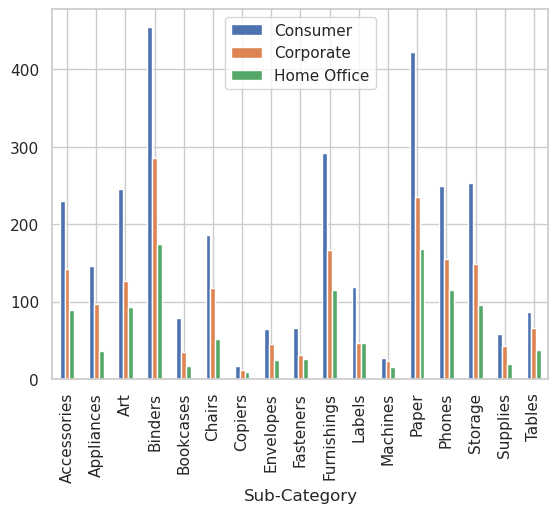

In [24]:
temp_df = pd.concat([consumer_cat,corporate_cat,homeoffice_cat], axis = 1)
temp_df.columns = ['Consumer','Corporate','Home Office']
temp_df.plot(kind = 'bar')
plt.show()

Ürünlerin segmentler tarafından ne kadar çok satın alındığı tabiki de segmentlerin toplam satışlardaki payıyla
doğru orantılı olarak gözükmektedir. Çok yüksek bir paya sahip olan Consumer segmenti burada da tüm kategorilerde
en yüksek satın alım oranına sahip. Diğer segmentler de sırasıyla gelmekte.

In [25]:
superstore_df['Total Ship Day'] = superstore_df['Ship Date'] - superstore_df['Order Date']
superstore_df['Total Ship Day'] = superstore_df['Total Ship Day'].astype('str')

In [26]:
superstore_df.loc[superstore_df['Total Ship Day'].str.startswith('-'), 'Total Ship Day'] = '3 Days' #ortalama gün verdik.

In [27]:
total_day_ship = superstore_df.groupby('Total Ship Day')['Total Ship Day'].count()

fig = px.pie(values = total_day_ship.values, names = total_day_ship.index.to_list(), title = 'How many days took for Shipment')
fig.update_traces(textposition = 'inside', textinfo = 'label+percent')
fig.show()

Yukarıdaki grafiklerde ise ortalama kargo süresinin analizini yaptık. Kargoların yüzde 50'ye yakını 
4-5 gün içerisinde gelmekte. Tabi şehirlere göre kargoların ne kadar sürede gittiğini görerek daha detaylı 
bir kargolama analizi yapabiliriz ama şuan pek gerek yok. Günün sonunda elimizde bir kargonun ortalama ne
kadar sürede geleceğini dair bir veriye sahibiz.

In [28]:
temp_df = superstore_df.copy()
brokens = temp_df[temp_df['Ship Mode'] == '3 Days'].index
temp_df.drop(brokens, inplace = True)
shipment_types = temp_df.groupby('Ship Mode')['Ship Mode'].count()

fig = px.pie(values = shipment_types.values, names = shipment_types.index.to_list(), title = 'Shipments Types Shares')
fig.update_traces(textposition = 'inside', textinfo = 'label+percent')
fig.show()

Standart Kargo insanların birinci tercihi olması normal çünkü insanlar genelde kargoya pek fazla ücret
vermek istemezler, bu yüzden kargo kampanyaları yapan şirketler her zaman öndedir. Bir şeyi alma eylemine
para ödemek asırlar boyunca bunu elden ele yapan insanoğlu için hala çok garip. Evet ödüyorlar ama pek ödemek de
istemiyorlar.

Kargo Tiplerinde biraz daha derinleşelim. Bakalım hangi kargo sınıfları ne kadarlık bir ürünü taşıyorlar ne 
kadar büyüklükte alışverişler için kullanılıyorlar

In [29]:
shipment_analysis = superstore_df[['Ship Mode', 'Price']].groupby('Ship Mode').mean().reset_index().round(1)

fig = px.bar(shipment_analysis, x = 'Ship Mode', y = 'Price', title = 'Price Mean for Shipment Types')
fig.show()

Hemen hemen aynı fiyattan ürünler adına kargo seçimleri yapılıyor gibi. Yani düşündüğüm gibi pahalı ürünler için Same Day veya First Class daha ağırlıklı değil birbirleri ile aşırı derece eşitler. O zaman daha farklı bir 
parametre olmalı, kargo seçimleri ile ilgili.

In [30]:
shipment_sales_profit = superstore_df[['Ship Mode','Sales','Profit']].groupby('Ship Mode').mean().reset_index().round(1)

fig = go.Figure(data = [
    go.Bar(x = shipment_sales_profit['Ship Mode'], y = shipment_sales_profit['Sales'], name = 'Sales'),
    go.Bar(x = shipment_sales_profit['Ship Mode'], y = shipment_sales_profit['Profit'], name = 'Profit')
])

fig.show()

Ortalama olarak Satış/Kar grafiğinde de bütün kargo tiplerinde benzer durumu görüyoruz. Satış rakamlarında da,
ciro rakamlarında da kargo tipinin ne olduğu pek güçlü bir unsur değil demek ki. Ya da şunu diyebilirim. 
Satılan ürünün fiyatı ya da getirisi kargo tipinde herhangi bir değişiklik yaratmıyor. Ama yine de
standart tip de kargonun diğerlerine göre daha ucuz alışverişlerde kullanıldığını söylebilirim. Evet pek uçuk bir
fark yok ama yine de diğer bütün kargo tiplerinden daha ucuz alışverişlerde kullanılmış. Aynı gün kargo daha pahalı alışverişlerde kullanılmasına karşın ciroyu yediği aşikar.

In [31]:
shipmode_dfs = []

for mode in superstore_df['Sub-Category'].unique():
    
    merge_df = superstore_df.loc[superstore_df['Sub-Category'] == mode]
    merge_df = merge_df.groupby('Ship Mode')['Ship Mode'].count()
    shipmode_dfs.append(merge_df)

shipmode_df = pd.concat(shipmode_dfs, axis = 1)
shipmode_df.columns = [str(mode) for mode in superstore_df['Sub-Category'].unique()]
shipmode_df.reset_index()


,Ship Mode,Bookcases,Chairs,Labels,Paper,Binders,Art,Appliances,Accessories,Phones,Furnishings,Storage,Fasteners,Envelopes,Supplies,Tables,Copiers,Machines
0,First Class,31,52,37,144,152,72,41,70,86,87,81,13,21,14,32,9,17
1,Same Day,5,20,11,55,48,22,13,26,29,34,33,7,8,7,17,3,6
2,Second Class,27,78,39,166,154,88,54,98,95,117,107,23,27,27,33,6,8
3,Standard Class,67,205,124,460,561,283,171,267,309,335,277,80,77,71,108,20,34


Kargo Tipi ve Kategori korelasyonunu incelediğimiz de pek bir bulgu bulamadık doğrusu. Consumer Segment - Category
korelasyonu ile hemen hemen aynı sonuçları verdi demek ki kategori de kargo tipi seçimlerde diğer parametrelerden
daha fazla güçlü bir parametre değilmiş. Consumer Segment - Kategori kolerasyonunda popüler kategorilerin 
burada da popüler olduğunu görüyoruz her üç kargo tipinde aynı kategoriler liderliği götürmekte. Kargo tiplerinin
kategorilere göre rakamları kargo tiplerinin genel alışveriş paylarıyla orantılı olarak görülüyor. Same Day 
diğerlerinden daha az görünmekte evet ama Same Day genel pay'da da az bir paya sahip olan bir kargo tipi
olduğu için bu mantıklı. First Class kargo tipinin makine ve copiers gibi büyük ve değerli eşyalarda standart kargoya karşı pek olmasa da diğer kargo tiplerine karşı bir üstünlüğü bulunmakta. Kargoya para verebilecek
olan müşteriler aynı günün yanı sıra daha güvenli bir kargo süreci istiyor diyebiliriz. Genel olarak 
bakıldığında müşterilerin first class kargoyu same daye göre terch etmelerinin ilk nedeni same dayin daha pahalı
olması ikincisi ise güvenlik düşüncesi olduğunu düşünüyorum. Second Class kötünün iyisi olarak hizmet
vermekte insanlar ürünleri biraz daha hızlı, çok değil! almak istediklerinde tercih etmektedirler. Standart
Kargonun liderliği en temelde insanların kargo için para ödememek istememesinden ve bu yüzden ödeyebilecekleri
en az parayla bu işi hallettiklerinden kaynaklanıyor. Onlar için en ucuz seçenek o ve çoğunluk bunu 
uyguluyor gibi. Daha sonrasında kargo tiplerinin - eyatler bazında korelasyonunu inceleyebiliriz.

In [32]:
shipmode_state_dfs = []

for state in superstore_df['State'].unique():
    
    merge_df = superstore_df.loc[superstore_df['State'] == state]
    merge_df = merge_df.groupby('Ship Mode')['Ship Mode'].count()
    shipmode_state_dfs.append(merge_df)

shipmode_state_df = pd.concat(shipmode_state_dfs, axis = 1)
shipmode_state_df.columns = [str(state) for state in superstore_df['State'].unique()]

for column in shipmode_state_df.columns:
    
    shipmode_state_df[str(column)] = shipmode_state_df[str(column)].fillna(0)
    
shipmode_state_df.reset_index()

,Ship Mode,Kentucky,California,North Carolina,Washington,Nebraska,Pennsylvania,Texas,Illinois,Florida,...,Kansas,Utah,Vermont,Maine,South Dakota,Arkansas,Idaho,North Dakota,Wyoming,West Virginia
0,First Class,11,201,25,48,2,63,92,43,27,...,3.0,3,0.0,0.0,0.0,10,4.0,0.0,0.0,0.0
1,Same Day,1,83,11,25,3,11,25,19,12,...,1.0,2,0.0,0.0,0.0,2,0.0,0.0,0.0,1.0
2,Second Class,38,238,28,63,2,55,117,55,41,...,0.0,8,0.0,0.0,1.0,10,2.0,5.0,0.0,0.0
3,Standard Class,23,667,95,201,18,206,331,176,132,...,9.0,10,9.0,2.0,7.0,17,6.0,2.0,1.0,3.0


Bu tabloda da hangi eyaletin hangi kargo tipine ne kadar ilgi gösterdiğini ortaya çıkardım. Bazı Eyaletler
birkaç kargo tipini hiç kullanmamış bu eyaletler genelde sipariş sayısının da az olduğu eyaletler bence buna
ileride bakacağız. 

In [33]:
categories = superstore_df[['Sub-Category','Sales','Profit']].groupby('Sub-Category').sum().reset_index().round(1)
categories_price_means = superstore_df[['Sub-Category','Price']].groupby('Sub-Category').mean().reset_index().round(1)

fig = make_subplots(rows = 2, cols = 1)

fig.add_trace(
    go.Bar(x = categories['Sub-Category'], y = categories['Sales'], name = 'Sales'),
    row = 1, col = 1
)

fig.add_trace(
    go.Bar(x = categories['Sub-Category'], y = categories['Profit'], name = 'Profit'),
    row = 1, col = 1
)

fig.add_trace(
    go.Bar(x = categories_price_means['Sub-Category'], y = categories_price_means['Price'], name = 'Mean Price'),
    row = 2, col = 1
)

fig.update_layout(height = 800, width = 800, title_text = 'Categories Sales/Profit and Mean Price Values')
fig.show()

Kategorilerin Satış/Ciro rakamlarını incelediğimde dikkatimi çeken ilk şey satış rakamları yüksek olan
kategorilerin ciro rakamlarının garip bir şekilde aşırı düşük olması. Bunun ana nedenlerinden biri rekabetçi
kategoriler olmaları ve tabi şirketin bu kategoriden satışlarla ilgili maliyetinin yüksek olması ama 
rekabetten dolayı fiyatını dengeli kuramaması olabilir, bunlar aynı zamanda şirketin çokça kampanya yaptığı
kategoriler de olabilir. Telefon, Sandalye ve Klasörlerde çokça satış yapmasına rağmen iyi bir ciro
tutturamayan şirket en pahalı kategorilerinden biri olan makineler kategorisinde yine iyi satış yapmış
ama ciro yapamamış bedavaya montaj ve ek hizmet veriyorsa demek!. 
Masa kategorisinde şirket baya bir satış yapmasına rağmen zarara uğramış görünüyor ve tabi onun yanında
genel olarak ciro satış rakamlarının baya gerisinde kalıyor gibi. En yüksek ciro fotokopi makineleri ve 
aksesuarlarda görünüyor. Biraz da fiyat grafiğini inceleyelim. 
En pahalı kategori en yüksek cironun olduğu kategori olan fotokopi makineleri ama tabi bunun yanı sıra
ikinci en pahalı kategori olmasına rağmen Makineler kategorisi hiç ciro yapamadı. Furnishing kategorisinin bu kadar ucuz olmasına şaşırdım küçük ev gereçlerinden oluşan bir ürün yelpazesi olsa gerek aynı zamanda Sanat kategorisinin en ucuz olması da yine basım sanatından ürünlerin dolu olduğu bir kategori olduğunu göstermekte. Telefon fiyatlarının günümüz fiyatlarından bu kadar aşağı olması da şaşırttı ya eski telefonlar ya da 
telefon gereçleri de telefon kategorisine eklenmiş bilemiyorum. Makineler kategorisi her ne kadar ciro
noktasında bu düşünceyi bozsa da Fiyat'ın Satış/Ciro korelasyonu güçlü görünüyor. Fiyatı yüksek olanlar yüksek
satış yapmış, ucuz olanlar ise daha az bir satış rakamına ulaşmış. Ciro kısmında ise birkaç kategori hariç
yine yüksek/düşük fiyat-yüksek/düşük ciro düşüncesini destekliyor. Bu 'aykırı' kategorilerin neden 
böyle olduğu ise rekabet, maliyet gibi birçok nedene dayandırılabilir.
Acaba bu satışları yüksek olmasın rağmen ciroları sönük gözüken kategoriler ağırlıklı olarak satışlarda iyi
olmasına rağmen ciroda payı neredeyse olmayan Texas, Illinois, Ohio gibi Eyaletlerden geliyor olabilir mi?.
Bunun üzerine Masa ve Makine kategorisini merceğe almak istiyorum.

In [34]:
tables = superstore_df[['State','Sub-Category','Sales','Profit']].loc[superstore_df['Sub-Category'] == 'Tables']
machines = superstore_df[['State','Sub-Category','Sales','Profit']].loc[superstore_df['Sub-Category'] == 'Machines']

tables = tables.groupby('State').sum(numeric_only = True).sort_values('Profit', ascending = True).reset_index().round(1)
machines = machines.groupby('State').sum(numeric_only = True).sort_values('Profit', ascending = True).reset_index().round(1)

tables.columns = ['State','Table Sales','Table Profit']
machines.columns = ['State','Machine Sales','Machine Profit']

tables_and_machines = pd.concat([tables,machines], axis = 1)
tables_and_machines

,State,Table Sales,Table Profit,State,Machine Sales,Machine Profit
0,Illinois,4005.1,-2686.2,Ohio,5408.3,-7725.2
1,Tennessee,5885.8,-2515.5,Colorado,3253.7,-4338.3
2,Arizona,3528.3,-2031.6,North Carolina,8695.7,-3867.8
3,New York,5165.9,-1791.8,Pennsylvania,1044.8,-1149.8
4,Florida,3786.4,-1765.7,Arizona,965.9,-930.9
5,Pennsylvania,4791.4,-1550.9,Tennessee,740.5,-274.4
6,North Carolina,4439.1,-1522.7,Oregon,180.0,-252.0
7,Texas,8594.6,-1232.4,Florida,1081.2,-146.5
8,Ohio,3816.1,-1087.5,Texas,2661.5,-135.8
9,Oregon,1118.9,-689.4,Illinois,2580.9,32.7


Yukarıdaki tabloda ise masa ve makineler kategorisinde en çok zarara uğratan eyaletleri listeledik. İki
kategoride de en çok zarara uğratan eyaletler cirodaki payı aşırı düşük olan eyaletler. Sadece masalar
konusunda New York gibi bir eyaletin bulunması şaşırttı ama ben bunu o eyalete özel bir kampanya veya strateji
olarak yorumluyorum. Fakat ne yazık ki Texas, Illionis, Ohio, Arizona, Pensilvanya gibi eyaletler ne kadar
zarar verdiklerini her tabloda gösteriyorlar ne yazık ki.

In [35]:
fig = make_subplots(rows = 1, cols = 2,specs=[[{"type": "domain"}, {"type": "domain"}]],
    subplot_titles=("<b>Sales<b>","<b>Profit<b>"))

fig.add_trace(
    go.Pie(labels = categories['Sub-Category'].values, values = categories['Sales'].values),
    row = 1, col = 1
)

fig.add_trace(
    go.Pie(labels = categories['Sub-Category'].values, values = categories['Profit'].values),
    row = 1, col = 2
)

fig.update_layout(height = 650, width = 850, title_text = 'Sales and Profit Shares by Categories')
fig.update_traces(textposition = 'inside', textinfo = 'label+percent')
fig.show()

Satışlarda güçlü olanlar ciroda orta sıralarda gözükmekte, cirolarda yüksek gözükenler ise satışlarda geride
gözükmekte. En yüksek ciro Copiers'ın olmasının yanı sıra, Satışlarda az gözüken kağıt gibi ev gereçleri gibi
kategorilerin ciroda paylarının daha yüksek olması da bu kategorilerin konjüktör kategoriler olduğunu
göstermekte. En dengeli paylara telefon kategorisi gibi. Evet telefon kategorisin satış ve ciro oranı çok 
kötü gözükmekte ama toplam üzerinden bakıldığında en dengeli paya bu kategori sahip. İki pasta da hemen hemen
aynı orana sahip ve yüksek paydaşlardan. Copiers, Appliances ve Paper kategorileri en güçlü kategoriler
olarak görüyorum. Bu kategorilerin satış ve ciro oranları çok iyi. Az satsa bile cirosu satış rakamları ile 
çok uyumlu. Bu kategorilerde pek bir maliyeti yok gibi şirketin veya rekabeti olmadığından da olabilir. Satış ve Ciro arasındaki denge demişken hadi şimdi bu dengeyi inceleyelim.

In [36]:
sales_profit_rate_cat = superstore_df[['Sub-Category','Sales','Profit']].groupby('Sub-Category').sum().reset_index().round(1)
sales_profit_rate_cat['Rate'] = sales_profit_rate_cat['Profit'] / sales_profit_rate_cat['Sales'] * 100.0

# Renkler Satış Hacimlerini temsil etmekte. Buna göre analiz edilmeli!
fig = px.bar(sales_profit_rate_cat, x = 'Sub-Category', y = 'Rate', title = 'Profit/Sales Rate by Category', color = (sales_profit_rate_cat['Sales']))
fig.update_xaxes(title_text = 'Category')
fig.update_yaxes(title_text = 'Rate %')
fig.show()

Yukarıdaki Grafikte ise Satış Rakamlarının ne kadarının Ciro'ya dönüştüğünü kategori bazından göstermeye
çalıştım. NOT: Barların renkleri kategorilerin satış büyüklüklerine göre renklendirilmiştir.

Aslında yukarıda Sales/Profit ve Price verilerini incelerken gördüğümüz gerçek burada daha da açık seçik bir
şekilde göz önünde. Yüksek satış hacimlerine sahip olan Masa, Makine, Klasör gibi kategoriler satışları 
kazançlara çevirmede zorluk çekerken daha az satış hacmine sahip olan kategorile, Hızlandırıcı, Gereçler, Zarf ve Etiket gibi kategoriler bu satışlarını kazanca çevirmede daha başarılılar ama tabi doğal olarak böyle olmasını
normal görüyorum. Bu saydığımız kategoriler iki durumdan da sınıflandırılabilirler. Rekabetçi kategoriler ve Çok
fazla rekabetçi olmayanlar. Zarf, Etiket, Pul, Aksesuar bunlar pek rekabetçi kategoriler değil ama makine, masa
gibi geniş ürün gamına ve güçlü rekabete sahip olan kategorilerde cironun azlığı yüksek ihtimalle kampanyalara
ve marketing adına yapılan ücretsiz ek hizmetlere dayanıyor. Tabi bu söylediğimin dışında kategoriler de 
mevcut. Mesela fotokopi makineleri de rekabetçi bir kategori, marka bolluğu ve yüksek fiyatlı bir ürün 
olması rekabetçiliği arttırıyor ama şirket burada ciroya dönüştürmeyi başarmış bu da şirketin
bu kategori konusunda tecrübeli olduğunu göstermekte. Müşterilerin kampanya ve ek hizmet haricinde böyle 
bir eğilim göstermesi şirketin güven veren konumunu gösteriyor bana göre. 
Kısaca bu düşüncemi açıklayayım, rekabetçi olan kategoriler yüksek satış rakamlarını ciroya dönüştürmekte
sıkıntılar çekerken, rekabetçi olmayan kategoriler orta ve az kademedeki satışlarını ciroya dönüştürmede pek
bir problem yaşamıyor gibi görünüyor. Tabi bunun dışında kategoriler de var bunun zannımca nedeni şirketin
profili veya avantaj sağlayan başka bir parametre olarak düşünüyorum. (Lokasyon, Envanter ve Ürün Çeşitliliği gibi vs.)

In [37]:
best_customers_names = superstore_df[['Customer ID','Customer Name','State','City','Ship Mode','Sub-Category','Segment','Sales','Price','Profit','Status']]

sales = best_customers_names[['Customer Name','Sales']].groupby('Customer Name').sum().sort_values('Sales', ascending = False).reset_index().round(1)
profit = best_customers_names[['Customer Name','Profit']].groupby('Customer Name').sum().sort_values('Profit', ascending = False).reset_index().round(1)
price = best_customers_names[['Customer Name', 'Price']].groupby('Customer Name').mean(numeric_only = True).sort_values('Price', ascending = False).reset_index().round(1)

new_df = sales.merge(right = profit)
new_df = new_df.merge(right = price)
new_df = new_df.sort_values('Profit', ascending = False)[:100]

print('Ortalama Fiyat Tercihi : %d$' % new_df['Price'].mean())
print('Ortalama Harcama Hacmi : %d$' % new_df['Sales'].mean())
print('Ortalama Kar Getirisi : %d$' % new_df['Profit'].mean())
print('\n')
print('Maksimum Harcama : %d$' % new_df['Sales'].max())
print('Maksimum Kar Getirisi : %d$' % new_df['Profit'].max())
print('Maksimum Fiyat Tercihi : %d$' % new_df['Price'].max())

best_customers_names = best_customers_names.sort_values('Profit', ascending = False).round(1)[:100]

Ortalama Fiyat Tercihi : 141$
Ortalama Harcama Hacmi : 4986$
Ortalama Kar Getirisi : 1375$


Maksimum Harcama : 18344$
Maksimum Kar Getirisi : 8764$
Maksimum Fiyat Tercihi : 892$


[Text(0, 0, 'Copiers'), Text(1, 0, 'Binders'), Text(2, 0, 'Machines'), Text(3, 0, 'Accessories'), Text(4, 0, 'Appliances'), Text(5, 0, 'Phones'), Text(6, 0, 'Chairs'), Text(7, 0, 'Tables'), Text(8, 0, 'Storage'), Text(9, 0, 'Bookcases'), Text(10, 0, 'Furnishings'), Text(11, 0, 'Labels')]

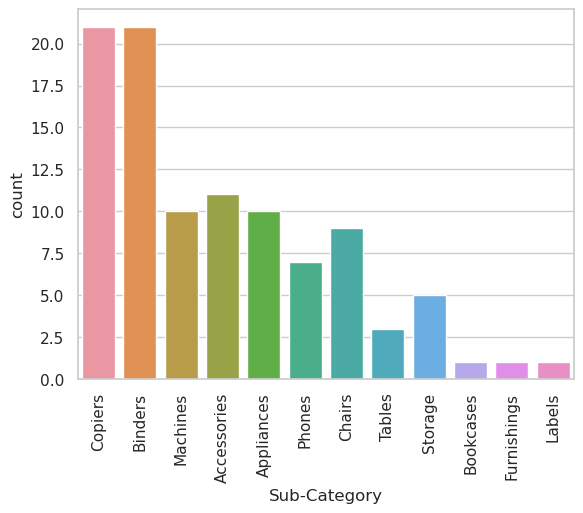

In [38]:
chart = sns.countplot(x = best_customers_names['Sub-Category'])
chart.set_xticklabels(rotation = 90, labels = best_customers_names['Sub-Category'].unique())

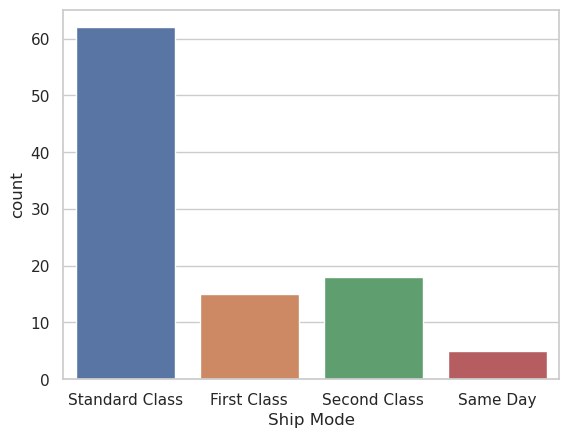

In [39]:
chart = sns.countplot(x = best_customers_names['Ship Mode'])

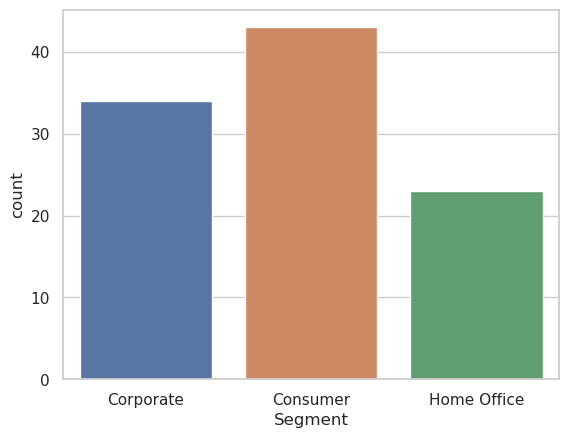

In [40]:
chart = sns.countplot(x = best_customers_names['Segment'])

[Text(0, 0, 'Indiana'), Text(1, 0, 'Washington'), Text(2, 0, 'Delaware'), Text(3, 0, 'Michigan'), Text(4, 0, 'New York'), Text(5, 0, 'Virginia'), Text(6, 0, 'Rhode Island'), Text(7, 0, 'New Jersey'), Text(8, 0, 'California'), Text(9, 0, 'Nevada'), Text(10, 0, 'Alabama'), Text(11, 0, 'Georgia'), Text(12, 0, 'Montana'), Text(13, 0, 'Pennsylvania'), Text(14, 0, 'Minnesota'), Text(15, 0, 'Kentucky'), Text(16, 0, 'Missouri'), Text(17, 0, 'Nebraska'), Text(18, 0, 'Wisconsin'), Text(19, 0, 'Texas'), Text(20, 0, 'Oklahoma'), Text(21, 0, 'Maryland'), Text(22, 0, 'Massachusetts'), Text(23, 0, 'Utah'), Text(24, 0, 'Vermont'), Text(25, 0, 'Mississippi')]

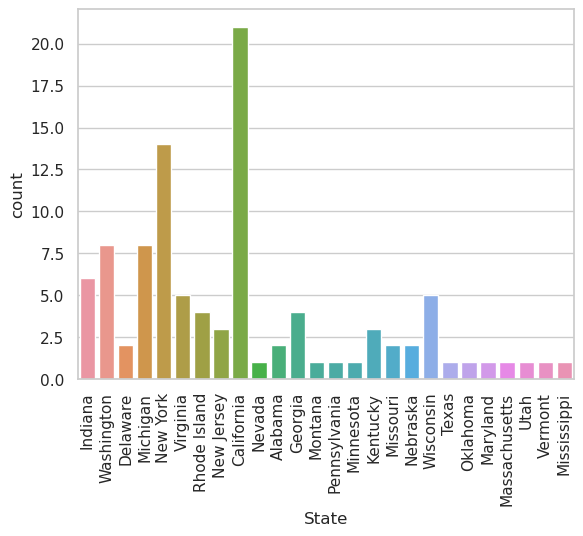

In [41]:
chart = sns.countplot(x = best_customers_names['State'])
chart.set_xticklabels(labels = best_customers_names['State'].unique(), rotation = 90)

Yukarıda en çok kazandıran 100 müşterinin Parametreler bazında verilerini görselleştirdim ve Satış/Ciro/Fiyat konusunda en avantajlı 100 müşteri hakkında genel bilgileri yazdırdım. Bunları inceleyelim.
En iyi kazandıran müşterilerin çoğunluğu New York, California, Washington ve Indiana gibi önceki State
chartlarında da önde gözüken eyaletler. İlk 100 müşteri ağırlıklı olarak Bireysel müşteri olarak gözükmekte
ama Corporate segmenti de azımsanmayacak kadar yüksek. Ilk 100 müşteri kargo konusunda genel kanıyı 
bozmayarak standart kargoyu ağırlıklı olarak kullanmış gözüküyor. En çok kazandıran müşterilerin 
eyaletleri, kargo tercihleri ve de segmentleri bu konularda yapılan analizler ile doğru orantılı gözüküyor.

In [42]:
orders_by_date = superstore_df.groupby('Order Date')['Order Date'].count()

fig = px.line(x = orders_by_date.index.to_list(), y = orders_by_date.values, title = 'Orders By Date', labels = {'x':'Date', 'y':'Order Count'})
fig.update_xaxes(title_text = 'Date')
fig.update_yaxes(title_text = 'Orders')
fig.show()

Burada ise tarih bazında sipariş sayılarını inceledim. Sipariş sayıları notebook'un en başındaki tarih-ciro
grafiği ile hemen hemen uyumlu gözükmekte. Ekim 2019'daki ciro çıkışı burada sipariş sayısının yüksekliği ile
kendisini göstermiş. Ve yine Ocakta ki ciro düşüşü de kendisini belli etmekte. Her senin Ekimden sonrası
yüksek bir şekilde inişli ve çıkışlı geçiyor gibi. Bir gün aşırı yükselirken gerek satış olarak gerek ciro
olarak gerekse sipariş sayısı olarak diğer veya birkaç gün sonrasında anında bu rakamlar çakılmış olabiliyor.
Bunun nedeninin ne olabileceğini merak etmekteyim ama daha fazla veriye ihtiyacım var. Bu yüzden derine inmeliyim.

In [43]:
orders_by_day = superstore_df.groupby(superstore_df['Order Date'].dt.day)['Order Date'].count()
orders_by_month = superstore_df.groupby(superstore_df['Order Date'].dt.month)['Order Date'].count()

fig = make_subplots(rows = 2, cols = 1)

fig.add_trace(
    go.Line(x = orders_by_day.index.to_list(), y = orders_by_day.values, name = 'Day'),
    row = 1, col = 1
)

fig.add_trace(
    go.Line(x = orders_by_month.index.to_list(), y = orders_by_month.values, name = 'Month'),
    row = 2, col = 1
)

fig.update_layout(height = 750, width = 800, title_text = 'Order Count by Days and Month')
fig.update_traces(textposition="bottom right")
fig.show()

/home/bilalcelebi/miniconda3/lib/python3.9/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




Yukarıdaki çizgi grafiklerinde ise gün ve ay bazında sipariş sayılarını inceledim. Ay bazında siparişler
yıl sonunda artış gösterirken yıl başından düşüş yaşıyormuş gibi görünüyor. Aynı zamanda yazdan sonbahara
geçişte de ciddi bir yükselme var. Şirketin satış ve ciro rakamlarını incelediğimiz de müşterilerin 
sonbahar eğilimlerini görmüştük. Şirket sonbahar aylarında diğer aylara nazaran çok çok daha iyi bir grafik
çiziyor, her açıdan.
Gün bazında ise tıpkı dolar kuru gibi dalgalı. Göze çarpan şey ise ayın başında, ortasında ve sonunda azımsanamayacak düşüşler olduğu neden böyle pek anlamış değilim. Genel olarak ay sonlar ise bir çakılma 
yaşıyormuş gibi görünmekte. Günlük olarak bu kadar dalgalı olması analizi zorlaştırıyor. Ortalama olarak gün
başına düşen sipariş sayısına da bakmak istiyorum.

In [44]:
print('Günlük Ortalama Sipariş Sayısı : %d' % orders_by_day.mean())
print('Aylık Ortalama Sipariş Sayısı : %d' % orders_by_month.mean())

Günlük Ortalama Sipariş Sayısı : 190
Aylık Ortalama Sipariş Sayısı : 491


In [45]:
best_days = superstore_df[['Order Date']].groupby(superstore_df['Order Date'].dt.day)['Order Date'].count().sort_values(ascending = False).round(1)

Yukarıdaki tabloda en çok sipariş alan günler listelenmiştir. Yılın en çok sipariş alan günü Ayın 2. Günü
olarak gözükmekte. Ay içerisinde başlangıç,orta ve son gün düşüşlerinden hemen önce yüksek sipariş sayıları
mevcut gibi gözüküyor. Ayın son günündeki ani düşüş de dikkat çekici. Yani sipariş sayıları bu düşüşlerden hemen önceki günlerde acayip yükseliyor ardından hemen düşüyor. Tabloda ilk başlarda gördüğünüz günlerle yukarıdaki gün-sipariş çizgi grafiğini karşılaştırırsanız bu dediğimi görürsünüz. Mesela 15-16. günde düşüşler var, sipariş sayısı çakılıyor ama hemen 14. günde hemen önceki günlere göre yükselme yapmış, yani önce bir yükselmiş sonra hemen düşmüş. Aklıma iki durum geliyor. Kampanya ve Envanter.

In [46]:
sales_and_profit_by_date = superstore_df[['Order Date','Sales','Profit']].groupby('Order Date').sum().reset_index().round(1)

fig = px.line(sales_and_profit_by_date, x = 'Order Date', y = ['Sales','Profit'], title = 'Sales and Profit By Day')
fig.show()

Genel bir inceleme adına da satış ve ciroların gün bazlı hareketlerini gösteren chartı buraya bırakıyorum.

In [47]:
base_rate = superstore_df['Profit'].sum() / superstore_df['Sales'].sum() * 100.0
print(f'Base Rate of Total Profit to Total Sales : %{base_rate.round(2)}')

Base Rate of Total Profit to Total Sales : %13.05


Hesaplamaya göre bütün alışverilerin sonunda toplam satışların ciroya dönüşme oranı %13 yani kazanılan paranın
sadece %13'ü Kâra dönüşebilmiş.

In [48]:
superstore_df['Profit to Sales Rate'] = superstore_df['Profit'] / superstore_df['Sales'] * 100.0

In [49]:
per_rate_mean = superstore_df['Profit to Sales Rate'].mean().round(1)
per_rate_min = round(superstore_df['Profit to Sales Rate'].min(), 1)
per_rate_max = round(superstore_df['Profit to Sales Rate'].max(), 1)

print(
    f'Average Sales/Profit Ratio per Purchase : %{per_rate_mean}',
    f'\nMaximum Sales/Profit Ratio per Purchase : %{per_rate_max}',
    f'\nMinimum Sales/Profit Ratio per Purchase : %{per_rate_min}'
)

Average Sales/Profit Ratio per Purchase : %12.2 
Maximum Sales/Profit Ratio per Purchase : %50.0 
Minimum Sales/Profit Ratio per Purchase : %-275.0


Yukarıda ise alışveriş başına ciro/satış oranlarını gösterdim. Alışveriş başına düşen averaj ciro/satış
oranı yani satışın ciroya dönüşme oranı %12 olarak görülüyor. En düşük %-275 ise çok fena bir rakam. Yani öyle
bir alışveriş olmuş ki müşterinin harcama yaptığı rakamın yüzde 275'i kadar zarar edilmiş o alışverişten. Bunun
için hem müşteriye ürünü bedavaya vermek lazım hem de ek bir masraf yapmak lazım gerçekten. En yüksek ise
satış rakamının yarısı kadar dönüşüm elde edilmiş.

In [50]:
superstore_df.loc[superstore_df['Profit to Sales Rate'] == superstore_df['Profit to Sales Rate'].min()]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Price,Status,Total Ship Day,Profit to Sales Rate
133,US-2020-155299,2020-06-08,2020-06-12,Standard Class,Dl-13600,Dorris liebe,Corporate,United States,Pasadena,Texas,...,Office Supplies,Appliances,Eureka Disposable Bags for Sanitaire Vibra Gro...,1.624,2,-4.466,0.812,Negative,4 days,-275.0
401,US-2020-119438,2020-03-18,2020-03-23,Standard Class,CD-11980,Carol Darley,Consumer,United States,Tyler,Texas,...,Office Supplies,Appliances,Hoover Portapower Portable Vacuum,2.688,3,-7.392,0.896,Negative,5 days,-275.0


%-275 zarar ettiren alışverişler de bunlar. Alışverişler ciro konusunda en sıkıntılı eyalet olan Texas'tan 
gelmiş. Alışverişlerden birini bireysel bir müşteri yaparken diğerini şirket olarak satın alım yapılmış. İki
alışverişte ciroda pozitif bir paya sahip olan Appliances kategorisinden yapılmış, tahminen bu alışverişler
yapılmasa Appliance kategorisinin ciro/satış oranı daha yüksek olabilirmiş. İki alışveriş de en pahalı
ürünleri içermekte. Ve iki müşteri de standart kargo methodunu kullanmışlar.

In [51]:
regions = superstore_df[['Region','Sales','Profit']].groupby('Region').sum().reset_index().round(1)
regions_prices = superstore_df[['Region','Price']].groupby('Region').sum().reset_index().round(1)

In [52]:
fig = make_subplots(rows = 1, cols = 2,specs=[[{"type": "domain"}, {"type": "domain"}]],
    subplot_titles=("<b>Sales<b>","<b>Profit<b>"))

fig.add_trace(
    go.Pie(labels = regions['Region'].values, values = regions['Sales'].values),
    row = 1, col = 1
)

fig.add_trace(
    go.Pie(labels = regions['Region'].values, values = regions['Profit'].values),
    row = 1, col = 2
)

fig.update_layout(height = 650, width = 850, title_text = 'Sales and Profit Shares by Regions')
fig.update_traces(textposition = 'inside', textinfo = 'label+percent')
fig.show()

Burada ise Regionların Toplam Satış ve Ciro içerisindeki payları inceledik. Regionların toplam satış ve ciro
paylarında konumları arasında doğru bir orantı gözükmekte. 

In [53]:
rate_by_products = superstore_df[['Product ID','Profit to Sales Rate']].groupby('Product ID').mean().sort_values('Profit to Sales Rate', ascending = False).reset_index().round(1)

best_rate_products = rate_by_products.head(10)
worst_rate_products = rate_by_products.tail(10)

fig = make_subplots(rows = 2, cols = 1)

fig.add_trace(
    go.Bar(x = best_rate_products['Product ID'], y = best_rate_products['Profit to Sales Rate'], name = 'Best'),
    row = 1, col = 1
)

fig.add_trace(
    go.Bar(x = worst_rate_products['Product ID'], y = worst_rate_products['Profit to Sales Rate'], name = 'Worst'),
    row = 2, col = 1
)

fig.update_layout(height = 900, width = 850, title_text = 'Best and Worst Sales and Profit Rates by Products', xaxis_title = 'Product', yaxis_title = 'Profit/Sales Rate %')
fig.show()

Yukarıdan iki grafikten anlaşılan şu ki en kötü ciro/satış oranına, en iyi ciro/satış oranına da sahip olan
Office kategorisi diyebiliriz. En iyi kar marji yapan ürünler de en kötü yapanlar da bu kategoriden
gözükmekte.

In [54]:
corr_tempdf = superstore_df[['Order Date','Ship Date','Ship Mode','Segment','City','State','Sub-Category','Sales','Profit','Price','Profit to Sales Rate']]
corr_table = corr_tempdf.apply(lambda x : pd.factorize(x)[0]).corr(method = 'pearson')

In [55]:
def sort_corr(df, key):
    return df.sort_values(key, ascending = False)

In [56]:
sort_corr(df = corr_table, key = 'Ship Date') 
#Bu fonksiyon ile ilgili bir column data sort ederek diğer parametrelerle korelasyonunu inceleyebilirsiniz.
#Sadece key verisini değiştirin.

,Order Date,Ship Date,Ship Mode,Segment,City,State,Sub-Category,Sales,Profit,Price,Profit to Sales Rate
Ship Date,0.346359,1.000000,0.031288,0.024765,0.067149,0.031116,0.006195,0.216041,0.250326,0.156374,0.087634
Order Date,1.000000,0.346359,0.017977,0.009938,0.060138,0.025934,0.008827,0.183694,0.208638,0.135776,0.073545
Profit,0.208638,0.250326,0.001146,0.004493,0.147126,0.016103,0.087102,0.846341,1.000000,0.552868,0.294097
Sales,0.183694,0.216041,0.010230,0.007112,0.123257,0.009028,0.095030,1.000000,0.846341,0.622801,0.291235
Price,0.135776,0.156374,0.014812,0.007987,0.069311,-0.003999,0.140198,0.622801,0.552868,1.000000,0.378719
Profit to Sales Rate,0.073545,0.087634,0.006553,-0.006515,0.013286,-0.044392,0.131844,0.291235,0.294097,0.378719,1.000000
City,0.060138,0.067149,0.024537,0.017605,1.000000,0.341783,-0.015651,0.123257,0.147126,0.069311,0.013286
Ship Mode,0.017977,0.031288,1.000000,0.024707,0.024537,0.013900,0.010403,0.010230,0.001146,0.014812,0.006553
State,0.025934,0.031116,0.013900,0.067779,0.341783,1.000000,0.006032,0.009028,0.016103,-0.003999,-0.044392
Segment,0.009938,0.024765,0.024707,1.000000,0.017605,0.067779,0.030694,0.007112,0.004493,0.007987,-0.006515


Bütün kolonlardaki korelasyonu incelerseniz eğer (kod yorumunu okuyun!), Kargo Teslim Tarihinin diğer bütün
parametreler ciddi bir bağı olduğunu göreceksiniz. Birbiri ile bağlantılı olan Sales,Profit,Price parametreleri
ile de güçlü bir ilişiği var gibi görünmekte. Müşterilerin alışverişlerinde Kargo Teslim tarihinin çok hayati
olmasa bile joker kadar değerli bir parametre olduğunu görmekteyiz. Bu yüzden rekabette avantaj elde etmek
adına müşteriye kargosunu erkenden ulaştırma sözü vermenin yanı sıra, ona kargosunun tam anlamıyla ne zaman
geleceğini bildirmek veya kısmı bir garanti vermek rakiplere karşı öne geçirebilir. Burada müşterileri 
bu parametre bazından iki şey satın almaya yönlendiriyor. Birincisi, kargonun erkenden ve garanti edilerek
gelmesi, İkincisi ise müşterinin kargosunun ne zaman geleceğini tam olarak biliyor olması bu planlarını daha
detaylı yapmasını sağlar ve ona süreç ile ilgili güven verir. Insanlar planlarla yaşar, yolunda gitmeyen
durumlar bizi sıkar, panikletir. Kargonun ne zaman geleceğini bilmek bile insana duruma hakim olduğuna dair bir
hale girmesini sağlayarak alışverişi yapmaya yaklaştırabilir. Tabi bunu böyle anlatarak her şey buna
bağlıymış gibi düşünmeyelim. Hayati değil ama önemli bir avantaj noktası diyorum.

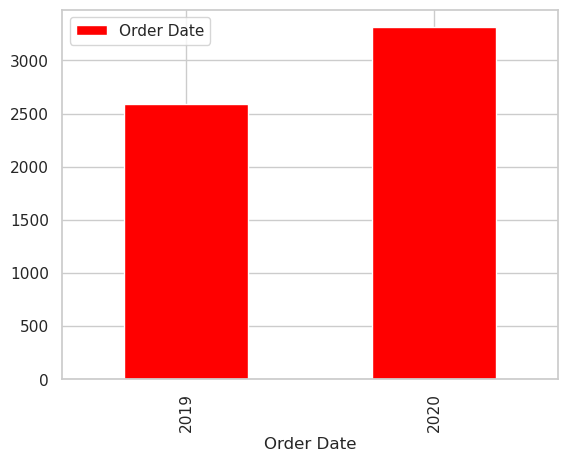

In [57]:
by_year = superstore_df[['Order Date']].groupby(superstore_df['Order Date'].dt.year).count()
by_year.plot(kind = 'bar', color = 'red')
plt.show()

In [58]:
year_base = superstore_df[['Order Date','Sales','Profit']].groupby(superstore_df['Order Date'].dt.year).sum(numeric_only = True).reset_index().round(1)

year_base_trace0 = go.Bar(x = year_base['Order Date'], y = year_base['Sales'], name = 'Sales')
year_base_trace1 = go.Bar(x = year_base['Order Date'], y = year_base['Profit'], name = 'Profit')

fig = go.Figure(data = [year_base_trace0,year_base_trace1], layout = dict(title = 'Total Sales and Profit by Year', xaxis_title = 'Year', yaxis_title = 'Sales and Profit ($k)'))
fig.show()

In [59]:
yearly_sales_change = year_base['Sales'].diff().values[1].round(1)
yearly_profit_change = year_base['Profit'].diff().values[1].round(1)

print(f'2020 Yılında Satışlar 2019 yılından {yearly_sales_change}$ daha fazla oldu.')
print(f'2020 Yılında Ciro 2019 yılından {yearly_profit_change}$ daha fazla oldu.')

2020 Yılında Satışlar 2019 yılından 124009.7$ daha fazla oldu.
2020 Yılında Ciro 2019 yılından 11644.1$ daha fazla oldu.


2020 yılında alışverişlerin daha çok olmasının yanı sıra bu alışveriş yükselişi satış ve ciro rakamlarına da
yansımış gözüküyor. Yıllar bazında hangi eyaletler daha çok satış yaptı, hangi kategoriler gitti diye
didikleyip arada aslında daha fazla olabilir miymiş diye bulabiliriz ama bana göre buna gerek yok. Evet 2020'de
daha fazla yapılabilirdi eğer pazarlama düzgün ayarlanabilseydi, özellike Texas ve Ohio gibi eyaletlerde ve de 
rekabeti az olan yerlere gerekli envanter ve ürün stratejisini doğru ayarlarak da daha fazla satış ve 
ciro elde edilebilirdi ama yine de tüm bunlara rağmen rakamlar yükselmiş şirket potansiyelin altında da olsa
bir başarı sergilemiş görünüyor.